# Pymaceuticals Inc.
---

### Analysis

One of the data conclusions that I realized when putting this data set together was though the bar graph, we can see that the drug “Capomulin” was the most successful out of all the drug trailed in reducing the size of the tumors in the mice trial.

The second conclusion would be per the plot grid showed that the larger the mouse in weight (g) the larger the diameter in mm3 the tumor was. The larger the tumor. 

Finally according to the pharmacy data , the drug Capomulin did appear to have allowed the mice much longer then the other drugs on trial. More study would need to be done if the drug itself was a cause of months increase or not.

Brian M

 

In [80]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pharm_complete = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")


# Display the data table for preview
pharm_complete


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [81]:
# Finding the number of Mice 
mouse_count = pharm_complete['Mouse ID'].nunique()  # Counts unique Mouse IDs
print(f"Number of unique Mouse IDs: {mouse_count}")

Number of unique Mouse IDs: 249


In [82]:
# Our data should be uniquely identified by Mouse ID and Timepoint
mouse_time = pharm_complete['Mouse ID'].value_counts()
mouse_time.unique = ['Mouse ID', 'Timepoint']
mouse_time

Mouse ID
g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: count, Length: 249, dtype: int64

In [83]:
# Optional: Get all the data for the duplicate mouse ID.
# you will get this per xlearning by taking mouse ID and doing a DF duplicate function using the combined data frame pharm_complete
duplicate_mouse_id = pharm_complete[pharm_complete.duplicated(['Mouse ID'], keep=False)]
print(duplicate_mouse_id)


     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [84]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask=pharm_complete["Mouse ID"] != "g989"
pharm_scrubed =pharm_complete.loc[mask].reset_index(drop=True)
pharm_scrubed


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [85]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean= pharm_scrubed['Mouse ID'].nunique()  # Counts unique Mouse IDs
print(f"Number of unique Mouse IDs: {mouse_count_clean}")

Number of unique Mouse IDs: 248


## Summary Statistics

In [86]:
 #copy of data set 
pharm_scrubed

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [87]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
avg_tumor= pharm_scrubed.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
                                


avg_tumor




Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [88]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
pharm_scrubed.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

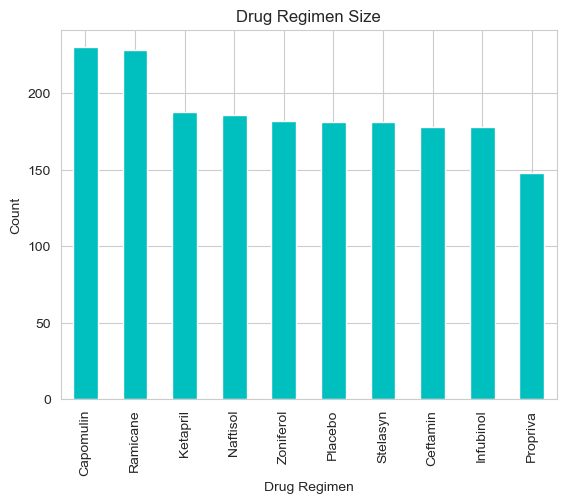

In [89]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pharm_scrubed.groupby("Drug Regimen").size().sort_values(ascending=False).plot(kind="bar", title="Drug Regimen Size", ylabel="Count", color="c",)

plt.show()

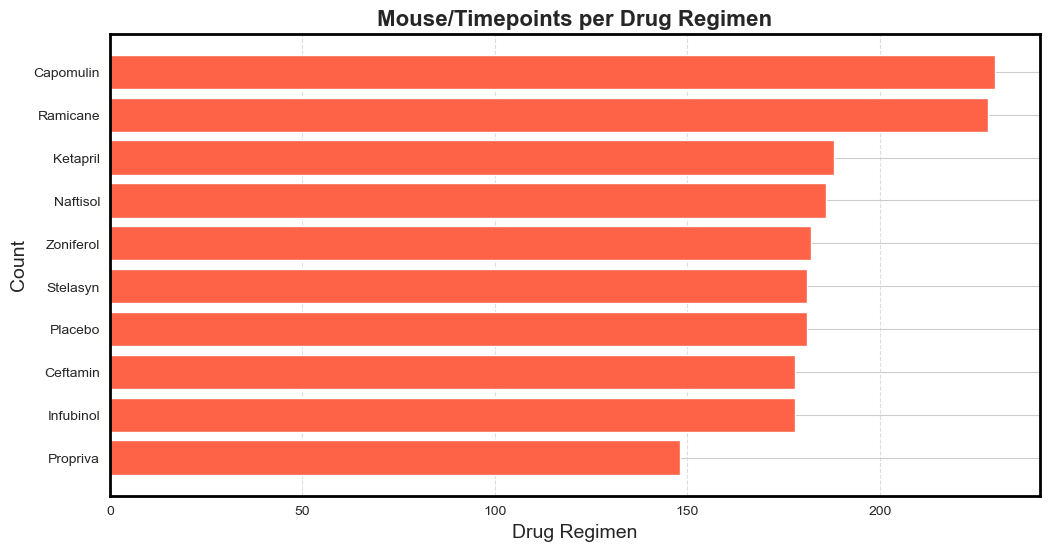

In [90]:
data = pharm_scrubed["Drug Regimen"].value_counts().sort_values()

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.barh(data.index, data.values, color="tomato", align="center",)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Drug Regimen", fontfamily="Arial", fontsize=14)
plt.ylabel("Count", fontfamily="Arial", fontsize=14)
plt.title("Mouse/Timepoints per Drug Regimen", fontweight="bold", fontsize=16, fontfamily="Arial")

# make the outerbox bold
ax = plt.gca() #gets current axes 
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)

# Set X/Y Limits
# plt.ylim(0, 350)

# Add in a background grid
plt.grid(axis="x", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

In [91]:
# Our data should be uniquely identified by Mouse ID and showing the distribution of unique female versus male mice used in the study
#count unique Mouse IDS by gender
Gender_counts =pharm_scrubed["Sex"].value_counts()
#pharm_scrubed["Mouse ID"].value_counts()
Gender_counts


Sex
Male      958
Female    922
Name: count, dtype: int64

In [92]:
#Get the unique mice with thier gender
unique_mouse_sex = pharm_scrubed[['Mouse ID', 'Sex']].drop_duplicates()
print(unique_mouse_sex)


     Mouse ID     Sex
0        k403    Male
10       s185  Female
20       x401  Female
30       m601    Male
40       g791    Male
...       ...     ...
1845     z314  Female
1847     z435  Female
1850     z581  Female
1860     z795  Female
1870     z969    Male

[248 rows x 2 columns]


In [93]:
#Find the number of Males vs females 

# Total number of mice
total_mice = 248

# Percentages
male_percentage = 50.4
female_percentage = 49.6

# Calculate number of male and female mice
male_mice = total_mice * (male_percentage / 100)
female_mice = total_mice * (female_percentage / 100)

print(f" male mice: {male_mice:.0f}")
print(f" female mice: {female_mice:.0f}")


 male mice: 125
 female mice: 123


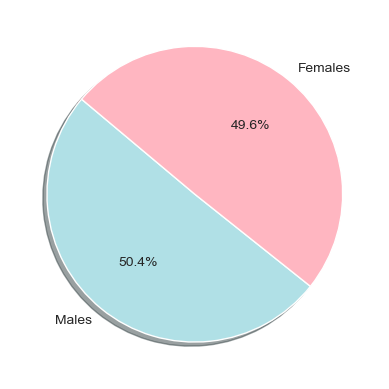

In [94]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the 
# Get the unique mice with their gender
# Labels for the sections of our pie chart
labels = ["Males", "Females"]

# The values of each section of the pie chart
sizes = [125,123]

# The colors of each section of the pie chart
colors = ["powderblue", "lightpink"]
# Make the pie chart
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors,
autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [95]:


# Our data should be uniquely identified by Mouse ID and Sex
mouse_sex = pharm_scrubed.groupby("Sex")["Mouse ID"]. nunique()
mouse_sex


Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

In [96]:
mouse_sex = pharm_scrubed[['Mouse ID', 'Sex']]
mouse_sex

,Mouse ID,Sex
0,k403,Male
1,k403,Male
2,k403,Male
3,k403,Male
4,k403,Male
...,...,...
1875,z969,Male
1876,z969,Male
1877,z969,Male
1878,z969,Male


In [97]:
# Get the unique mice with their Gender
unique_mouse_sex = pharm_scrubed[['Mouse ID', 'Sex']].drop_duplicates()
unique_mouse_sex


,Mouse ID,Sex
0,k403,Male
10,s185,Female
20,x401,Female
30,m601,Male
40,g791,Male
...,...,...
1845,z314,Female
1847,z435,Female
1850,z581,Female
1860,z795,Female


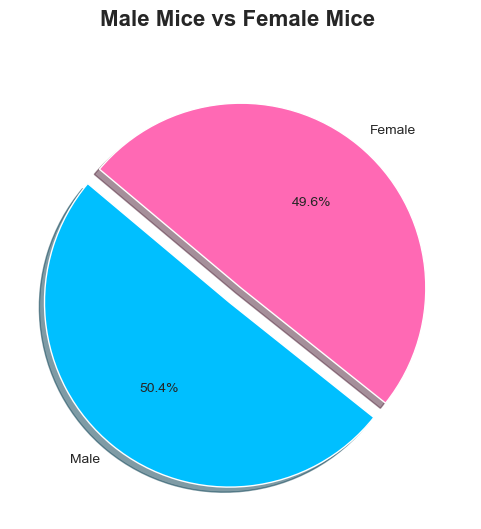

In [98]:
# python pie chart

M_vs_F = [125,123]
labels = ['Male','Female']
colors = ['deepskyblue', 'hotpink']
explode = (0.1,0)  # explode 1st slice

plt.figure(figsize=(6, 6))

# Create a basic plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Customizations
plt.title("Male Mice vs Female Mice \n", fontweight="bold", fontsize=16, fontfamily="Arial")

plt.show()


## Quartiles, Outliers and Boxplots

In [99]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = pharm_scrubed.groupby('Mouse ID')['Timepoint'].max().reset_index()
#last_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_data_timepoint = pd.merge(last_timepoint,pharm_scrubed, on=['Mouse ID','Timepoint'])

# turn the treatments into a list we can use 
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#final_data_timepoint, make an empty list 
final_tumor_volumes = {}
for treatment in treatments:
    treatment_data = final_data_timepoint[final_data_timepoint['Drug Regimen'] == treatment]
    final_tumor_volumes[treatment] = treatment_data['Tumor Volume (mm3)'].tolist()
final_tumor_volumes
# final_tumor_volumes now contains the final tumor volumes for each treatment
#for treatment, volumes in final_tumor_volumes.items():
   # print(f"{treatment}: {volumes}")



{'Capomulin': [38.98287774,
  38.93963263,
  30.48598484,
  37.07402422,
  40.1592203,
  47.68596303,
  37.31184577,
  38.1251644,
  38.75326548,
  41.48300765,
  38.84687569,
  28.43096411,
  33.32909778,
  46.53920617,
  32.37735684,
  41.58152074,
  23.34359787,
  40.72857787,
  34.45529799,
  31.02392294,
  40.65812366,
  39.95234669,
  36.04104736,
  28.48403281,
  31.8962384],
 'Ramicane': [38.4076183,
  43.0475426,
  38.81036633,
  32.97852192,
  38.34200823,
  33.39765251,
  37.31123552,
  40.65900627,
  29.12847181,
  33.56240217,
  36.37451039,
  31.56046955,
  36.13485243,
  22.05012627,
  30.56462509,
  31.09533505,
  45.22086888,
  36.56165229,
  37.22565033,
  43.41938077,
  30.27623175,
  40.66771292,
  43.16637266,
  44.18345092,
  30.63869575],
 'Infubinol': [67.97341878,
  65.52574285,
  57.03186187,
  66.08306589,
  72.2267309,
  36.3213458,
  60.96971133,
  62.43540402,
  60.91876652,
  67.28962147,
  66.19691151,
  62.11727887,
  47.01036401,
  60.16518046,
  55.62

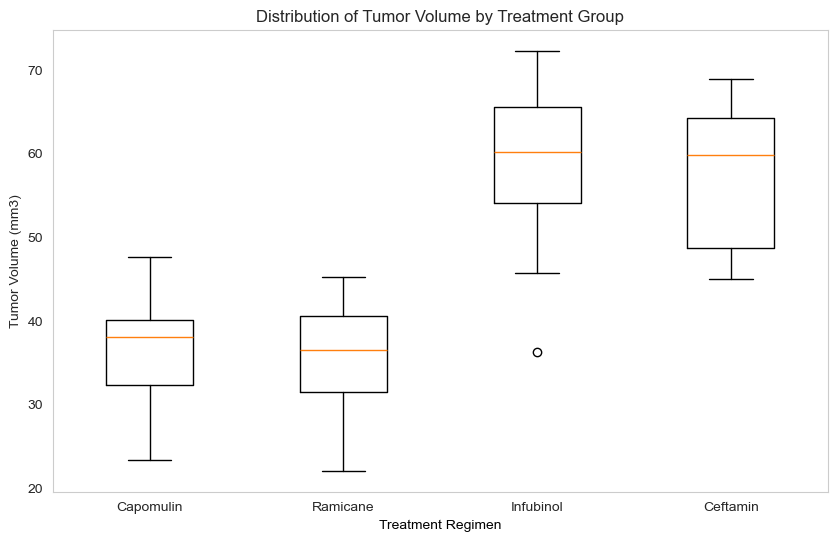

In [100]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
bp = plt.boxplot([final_data_timepoint[final_data_timepoint['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatments], labels=treatments)

plt.title('Distribution of Tumor Volume by Treatment Group')
plt.xlabel('Treatment Regimen', color="black")
plt.ylabel('Tumor Volume (mm3)')




plt.grid()
plt.show()


## Line and Scatter Plots

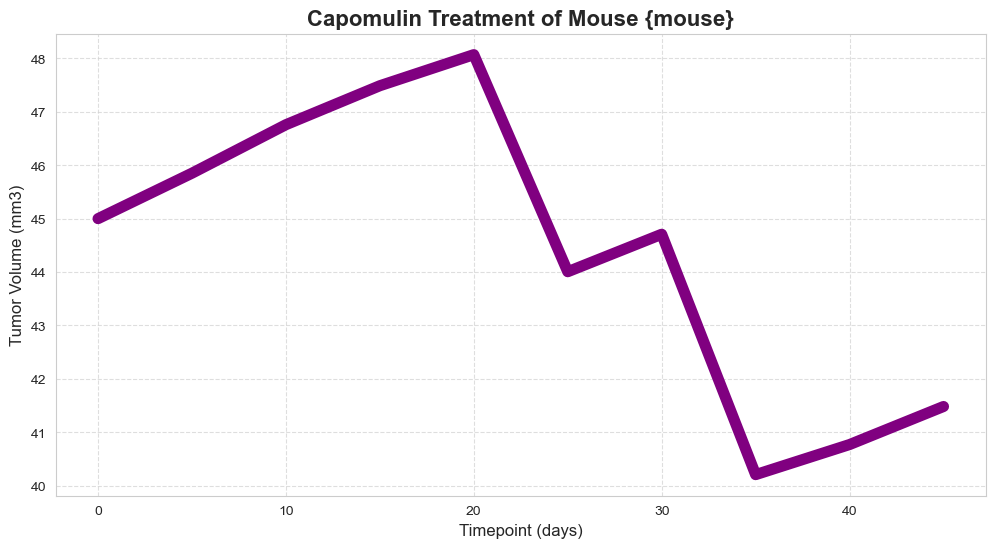

In [101]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# select a mouse who is receving the Capomulin treatment
mouse = "l509"

capo_mouse = pharm_complete.loc[pharm_complete['Mouse ID'] == mouse].sort_values(by='Timepoint',ascending=True)



# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.plot(capo_mouse.Timepoint,capo_mouse["Tumor Volume (mm3)"], color = "purple", linewidth =8)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Timepoint (days)", fontfamily="Arial", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.title("Capomulin Treatment of Mouse {mouse}", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
# plt.ylim(150, 650)
# plt.xlim(11, 26)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

In [102]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Put treatments into a list for for loop (and later for plot labels)
regimen = "Capomulin"

capo_dat = pharm_scrubed.loc[pharm_scrubed["Drug Regimen"] == regimen]
#capo_dat
#take capo_data and group by the mouse ID 
capo_dat.groupby("Mouse ID").agg({"Tumor Volume (mm3)" : "mean", "Weight (g)" : "mean"}).reset_index()



,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22.0
b742,40.083699,21.0
f966,36.505973,17.0
g288,41.990097,19.0
g316,44.613344,22.0
i557,44.805810,24.0
i738,39.141053,20.0
j119,44.465236,23.0
j246,43.216925,21.0


## Correlation and Regression

In [103]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Group by "Mouse ID" and calculate the mean for "Tumor Volume (mm3)" and "Weight (g)"
mean_data = capo_dat.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"})

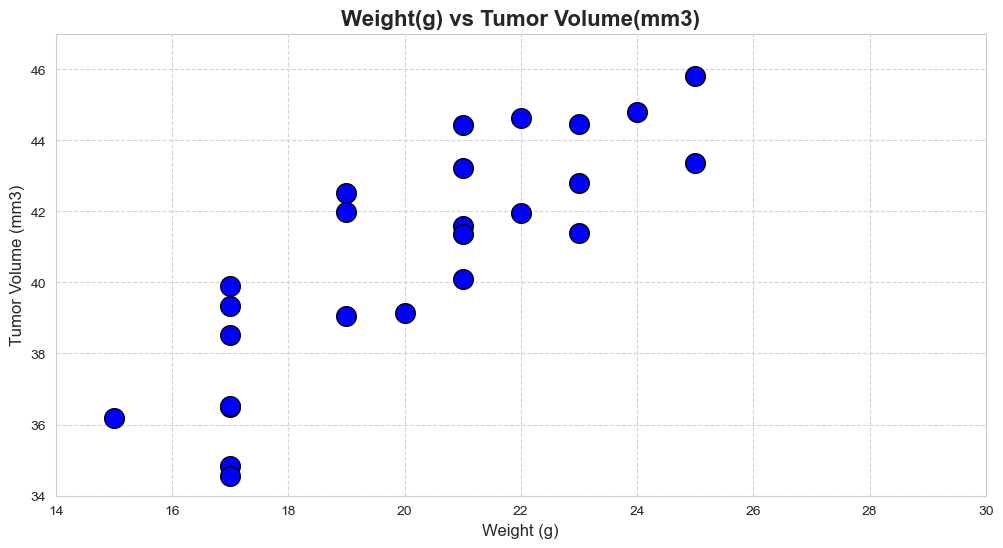

In [128]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic scatter plot using the mean values
plt.scatter(mean_data["Weight (g)"], mean_data["Tumor Volume (mm3)"], color="blue", edgecolor="black", s=200)

# Add Labels/Title
plt.xlabel("Weight (g)", fontfamily="Arial", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.title("Weight(g) vs Tumor Volume(mm3)", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
plt.ylim(34, 47)
plt.xlim(14, 30)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=1.0)

# Show Graph
plt.show()

In [105]:
print(capo_dat.head())

   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   

    Tumor Volume (mm3)  Metastatic Sites  
10           45.000000                 0  
11           43.878496                 0  
12           37.614948                 0  
13           38.177232                 0  
14           36.866876                 0  


In [129]:
mean_data


,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22.0
b742,40.083699,21.0
f966,36.505973,17.0
g288,41.990097,19.0
g316,44.613344,22.0
i557,44.805810,24.0
i738,39.141053,20.0
j119,44.465236,23.0
j246,43.216925,21.0


In [137]:
# line of best fit 
x_values =mean_data["Weight (g)"]
y_values = mean_data["Tumor Volume (mm3)"]

# do regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept # these are the points/predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(rvalue)
                

y = 0.95x + 21.55
0.8419363424694721


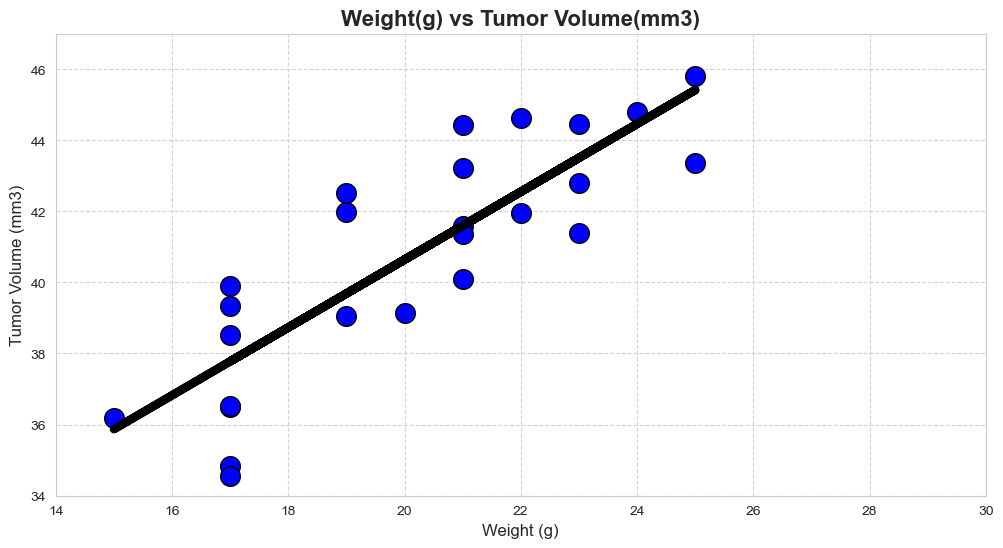

In [135]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic scatter plot using the mean values
plt.scatter(mean_data["Weight (g)"], mean_data["Tumor Volume (mm3)"], color="blue", edgecolor="black", s=200)

# Add Labels/Title
plt.xlabel("Weight (g)", fontfamily="Arial", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.title("Weight(g) vs Tumor Volume(mm3)", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
plt.ylim(34, 47)
plt.xlim(14, 30)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=1.0)
#Line of regression 
plt.plot(mean_data["Weight (g)"] ,regress_values, color="black", linewidth=6)
plt.annotate(line_eq, (10, 11), fontsize=15, color="black")
# Show Graph
plt.show()